In [1]:
!pip install wordcloud

You are using pip version 9.0.3, however version 20.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
#importing the required modules for twitter sentiment analysis

import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [5]:
#loading the dataset.csv
dataset = pd.read_csv('dataset.csv', encoding='ISO-8859-1', names = ['Sentiment', 'Id', 'Date', 'Flag', 'User', 'Tweet'])

In [6]:
print("Total tweets in the dataset: {} Million".format(dataset.shape[0]/1000000.0))

Total tweets in the dataset: 1.6 Million


In [7]:
#information about type of data and null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1600000 non-null  int64 
 1   Id         1600000 non-null  int64 
 2   Date       1600000 non-null  object
 3   Flag       1600000 non-null  object
 4   User       1600000 non-null  object
 5   Tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


No handles with labels found to put in legend.


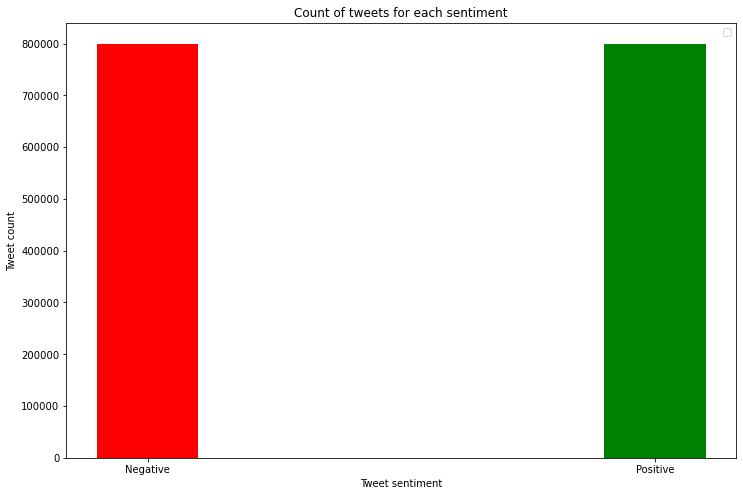

In [11]:
#checking number of positive and negative twets

class_count = dataset['Sentiment'].value_counts() # Returned in descending order [4, 0]
plt.figure(figsize = (12, 8))
plt.xticks([4, 0], ['Positive', 'Negative'])
plt.xticks([4, 0])
plt.bar(x = class_count.keys(), 
        height = class_count.values, 
        color = ['g', 'r'])
plt.xlabel("Tweet sentiment")
plt.ylabel("Tweet count")
plt.title("Count of tweets for each sentiment")
plt.legend()

In [8]:
dataset['Month'] = dataset['Date'].apply(lambda date: date.split(' ')[1])
months_count = dataset['Month'].value_counts()

Text(0.5, 1.0, 'Tweets during months of 2009')

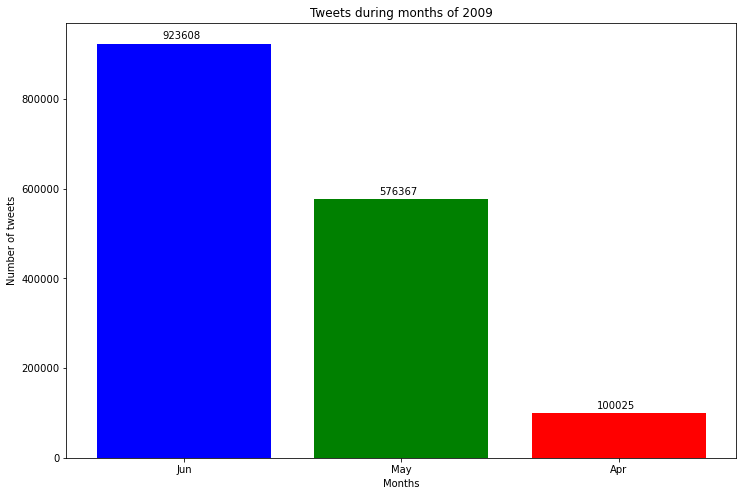

In [9]:
#Grapg for no of tweets in each month

plt.figure(figsize = (12, 8))
plt.bar(['Jun', 'May', 'Apr'], months_count.values, color = ['b', 'g', 'r'])
for i, v in enumerate(months_count.values):
    plt.text(i - 0.1, v + 10000, str(v))
plt.xlabel('Months')
plt.ylabel('Number of tweets')
plt.title('Tweets during months of 2009')

In [10]:
print(dataset['Tweet'][0])
print(dataset['Tweet'][1])

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!


In [12]:
positive_tweets = ' '.join(dataset[dataset['Sentiment'] == 4]['Tweet'].str.lower())
negative_tweets = ' '.join(dataset[dataset['Sentiment'] == 0]['Tweet'].str.lower())

Text(0.5, 1.0, 'Positive tweets Wordcloud')

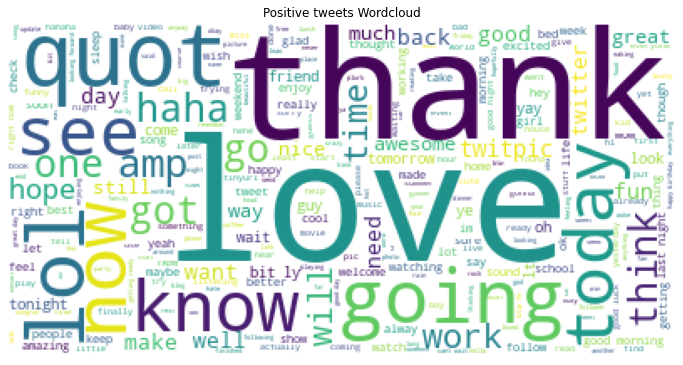

In [13]:
#positive tweets

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(positive_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Positive tweets Wordcloud")

Text(0.5, 1.0, 'Negative tweets Wordcloud')

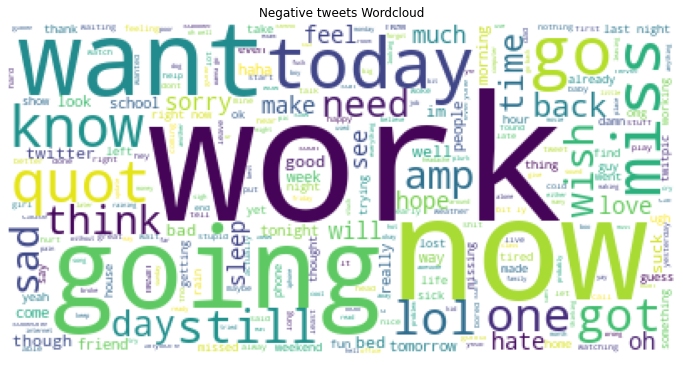

In [14]:
#negative tweets.

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = "white", max_words = 1000).generate(negative_tweets)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Negative tweets Wordcloud")